In [45]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
from glob import glob
import seaborn as sns
plt.style.use(['voresStyle.mplstyle'])
imagenr = '00000'
bluh = '000003'
n = '082'
# C:/Users/denni/Documents/HCAI/02501_adlcv/adlcv_anomaly/data/brats21/processed/testing/000003
imgs = [nib.load(f"../data/brats21/BraTS2021_Training_Data/BraTS2021_{imagenr}/BraTS2021_{imagenr}_{m}.nii.gz").get_fdata().astype(np.float32)[:, :, :] for m in ["flair", "t1", "t1ce", "t2"]]
lbl = nib.load(f"../data/brats21/BraTS2021_Training_Data/BraTS2021_{imagenr}/BraTS2021_{imagenr}_seg.nii.gz").get_fdata().astype(np.uint8)[:, :, :]
# imgs = [nib.load(f"../data/brats21/processed/testing/{bluh}/BraTS2021_{imagenr}_{m}_{n}.nii.gz").get_fdata().astype(np.float32)[:, :] for m in ["flair", "t1", "t1ce", "t2"]]
# lbl = nib.load(f"../data/brats21/processed/testing/{bluh}/BraTS2021_{imagenr}_seg_{n}.nii.gz").get_fdata().astype(np.uint8)[:, :]


In [3]:
import numpy as np
from mayavi import mlab
# Requires mayavi and PyQt5

def plot_3d_slices(slices, labels):
    # Create figure
    fig = mlab.figure(size=(800, 600))
    
    # Create 3D binary volume
    volume = np.zeros_like(slices)
    volume[slices != 0] = 1
    
    # Plot 3D volume
    src = mlab.pipeline.scalar_field(volume)
    vol = mlab.pipeline.volume(src, vmin=0, vmax=1)
    
    # Plot segmentation labels
    label_volume = np.zeros_like(labels)
    label_volume[labels != 0] = 1
    
    # Plot 3D volume
    src_lab = mlab.pipeline.scalar_field(label_volume)
    vol_lab = mlab.pipeline.volume(src_lab, vmin=0, vmax=1, color=(0.2, 0.7, 0.9))    
    
    # Show slice outlines
    # outline_lab = mlab.pipeline.outline(src_lab)
    # outline_lab.actor.property.color = (0, 0, 0)
    # outline_lab.actor.property.line_width = 2.0
    
    # Adjust camera position
    mlab.view(azimuth=45, elevation=45, distance='auto')

    mlab.show()

# Example usage
# Generate some random binary 2D slices
slices = imgs[2] # 10 binary slices of size 240x240
labels = lbl

# Plot 3D visualization
plot_3d_slices(slices, labels)

In [46]:
# Load png images
import cv2
import os
import numpy as np

im1 = cv2.imread('C:/Users/denni/Documents/HCAI/02501_adlcv/adlcv_anomaly/results/images/fullbrain_x.png')
# Flip image horizontally
im1 = cv2.flip(im1, 0)
im2 = cv2.imread('C:/Users/denni/Documents/HCAI/02501_adlcv/adlcv_anomaly/results/images/fullbrain_z.png')
# im2 = cv2.flip(im2, 0)
# im2 = cv2.flip(im2, 1)


# # Change the white to black in the images
# im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
# im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)


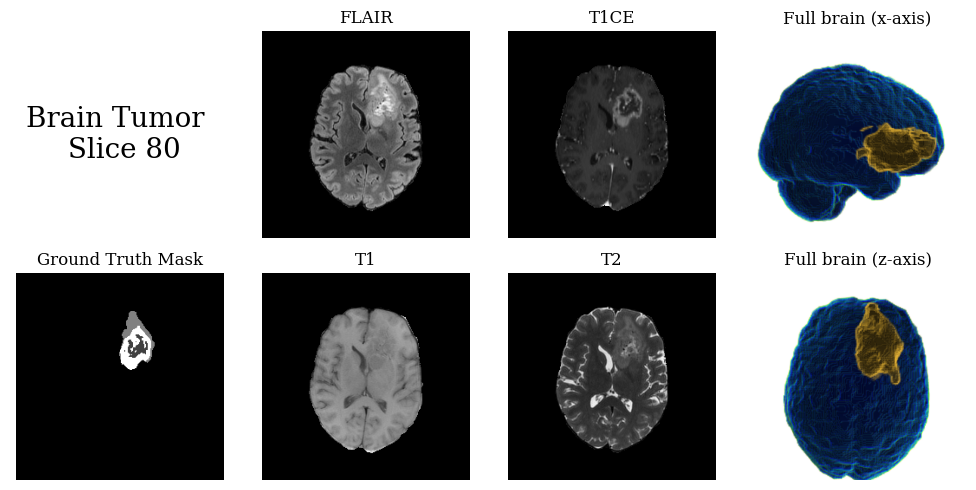

In [53]:
# Create figure with matplotlib
sliceno = 80
fig, ax = plt.subplots(2, 4, figsize=(10, 5))

ax[0,3].imshow(im1, cmap='gray')
ax[0,3].set_title('Full brain (x-axis)')
ax[1,3].imshow(im2, cmap='gray')
ax[1,3].set_title('Full brain (z-axis)')
ax[0,3].set_xlim([256, 256+290])
ax[0,3].set_ylim([150, 425])
ax[1,3].set_xlim([256, 256+290])
ax[1,3].set_ylim([150, 425])

# ["flair", "t1", "t1ce", "t2"]
ax[0,1].imshow(imgs[0][ :, :, sliceno].T, cmap='gray')
ax[0,1].set_title('FLAIR')
ax[1,1].imshow(imgs[1][ :, :, sliceno].T, cmap='gray')
ax[1,1].set_title('T1')
ax[0,2].imshow(imgs[2][ :, :, sliceno].T, cmap='gray')
ax[0,2].set_title('T1CE')
ax[1,2].imshow(imgs[3][ :, :, sliceno].T, cmap='gray')
ax[1,2].set_title('T2')
ax[1,0].imshow(lbl[ :, :, sliceno].T, cmap='gray')
ax[1,0].set_title('Ground Truth Mask')
# Insert text into ax[1,3]
ax[0,0].text(0.5, 0.5, f'Brain Tumor \n Slice {sliceno}', horizontalalignment='center', verticalalignment='center', fontsize=20)
# Axis off for all subplots
for i in range(2):
    for j in range(4):
        # ax[i,j].set_aspect('equal')
        ax[i,j].axis('off')
plt.tight_layout()
plt.savefig('C:/Users/denni/Documents/HCAI/02501_adlcv/adlcv_anomaly/results/images/brain_slices.pdf')


In [4]:
# Investigate data distribution and class imbalance
# Load the data
import numpy as np
import glob
train_paths = glob.glob('C:/Users/denni/Documents/HCAI/02501_adlcv/adlcv_anomaly/data/brats21/processed/training/*')
test_paths = glob.glob('C:/Users/denni/Documents/HCAI/02501_adlcv/adlcv_anomaly/data/brats21/processed/testing/*')

In [5]:
print(f'Number of training images: {len(train_paths)}')
print(f'Number of testing images:  {len(test_paths)}')

Number of training images: 55167
Number of testing images:  6132


In [26]:
def countSlices(paths):
    import nibabel as nib
    from tqdm import tqdm
    n_health = 0
    n_disease = 0
    for tp in (pbar:=tqdm(paths)):
        sub_paths = glob.glob(tp + '/*')
        # regex to get the path with seg in it
        seg_paths = [sp for sp in sub_paths if 'seg' in sp]
        image = nib.load(seg_paths[0]).get_fdata()
        assert image.shape == (240, 240, 155), f'Image shape is {image.shape}'
    return n_health, n_disease

In [8]:
train_health, train_disease = countSlices(train_paths)
test_health, test_disease = countSlices(test_paths)

Health: 0, Disease: 6:   0%|          | 0/55167 [00:00<?, ?it/s]

Health: 2138, Disease: 3994: 100%|██████████| 6132/6132 [01:04<00:00, 95.17it/s] 


In [27]:
import glob

path = glob.glob('C:/Users/denni/Documents/HCAI/02501_adlcv/adlcv_anomaly/data/brats21/BraTS2021_Training_Data/*')
countSlices(path)

100%|██████████| 1251/1251 [01:35<00:00, 13.05it/s]


(0, 0)